In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv(r"F:\DSA\Data Sets\Restaurant Data.csv")

In [82]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [83]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [84]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [85]:
data['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [86]:
data['Cuisines'].fillna(data['Cuisines'].mode()[0], inplace = True)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [88]:
data.drop(['Address', 'Locality', 'Locality Verbose'], axis = 1, inplace = True)

In [89]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


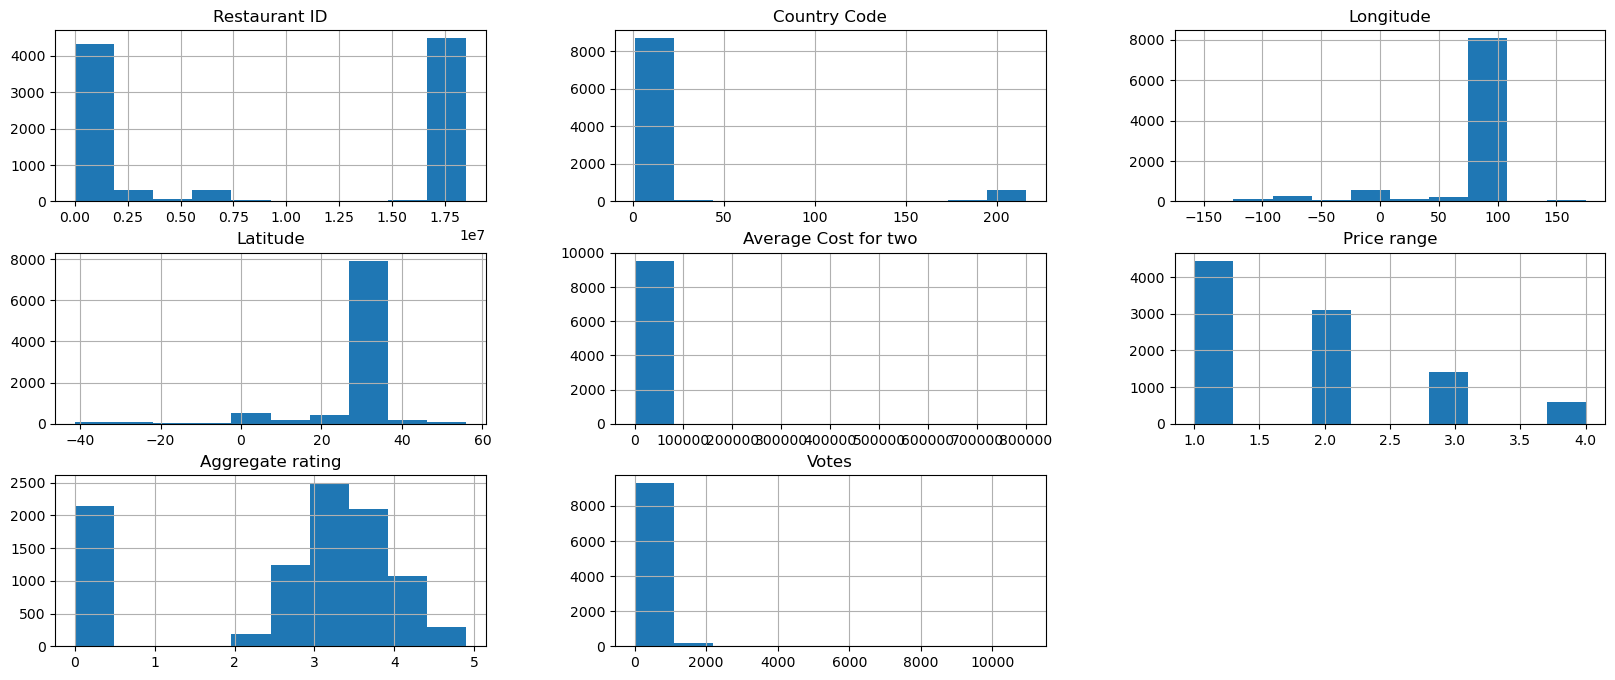

In [90]:
data.hist(figsize = (20,8))
plt.show()

In [91]:
from sklearn.preprocessing import OrdinalEncoder

In [92]:
data.set_index('Restaurant ID', inplace = True)

In [93]:
data

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,,,,
6317637,Le Petit Souffle,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
6304287,Izakaya Kikufuji,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
6318506,Ooma,162,Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
6314302,Sambo Kojin,162,Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915730,Naml۱ Gurme,208,��stanbul,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
5908749,Ceviz A��ac۱,208,��stanbul,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
5915807,Huqqa,208,��stanbul,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661


In [94]:
data.loc[6317637, 'Country Code']

162

In [95]:
data['Country Code'].value_counts()

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [96]:
data.loc[(data['Country Code'] == 216)]

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,,,,
17284404,Austin's BBQ and Oyster Bar,216,Albany,-84.221535,31.610387,"BBQ, Burger, Seafood",25,Dollar($),No,No,No,No,2,3.3,Orange,Average,35
17284203,BJ's Country Buffet,216,Albany,-84.207095,31.608743,"American, BBQ",10,Dollar($),No,No,No,No,1,3.3,Orange,Average,25
17284105,Cookie Shoppe,216,Albany,-84.154000,31.577200,North Indian,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
17284302,El Vaquero Mexican Restaurant,216,Albany,-84.219400,31.615800,Mexican,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,45
17284397,Elements Coffee Co - Northwest,216,Albany,-84.206944,31.622412,"Coffee and Tea, Sandwich",10,Dollar($),No,No,No,No,1,3.4,Orange,Average,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697389,The Screaming Eagle,216,Waterloo,-92.335523,42.498400,"American, Bar Food",10,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
17697424,The Thai Bowl,216,Waterloo,-92.335769,42.497919,Thai,10,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
17697332,Tokyo Japanese Steak House,216,Waterloo,-92.323400,42.465580,"Japanese, Steak, Sushi",25,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


In [97]:
data = data[(data['Country Code'] == 1)] 

In [98]:
data

,Restaurant Name,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,,,,
3400025,Jahanpanah,1,Agra,78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
3400341,Rangrezz Restaurant,1,Agra,0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
3400005,Time2Eat - Mama Chicken,1,Agra,78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
3400017,Pinch Of Spice,1,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800100,D Cabana,1,Vizag,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,193
2800418,Kaloreez,1,Vizag,0.000000,0.000000,"Cafe, North Indian, Chinese",400,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,85
2800881,Plot 17,1,Vizag,83.315281,17.719539,"Burger, Pizza, Biryani",600,Indian Rupees(Rs.),No,No,No,No,2,4.3,Green,Very Good,172


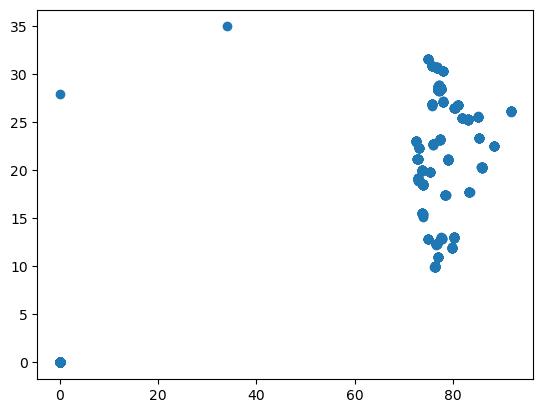

In [99]:
lat_long = data[['Longitude', 'Latitude']]
lat, long = data.Latitude, data.Longitude
plt.scatter(long, lat)
plt.show()

In [100]:
df = data.copy()

In [101]:
df.drop(['Restaurant Name', 'Currency', 'Country Code'], axis = 1, inplace = True)

In [102]:
df

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,
3400025,Agra,78.011544,27.161661,"North Indian, Mughlai",850,No,No,No,No,3,3.9,Yellow,Good,140
3400341,Agra,0.000000,0.000000,"North Indian, Mughlai",700,No,No,No,No,2,3.5,Yellow,Good,71
3400005,Agra,78.011608,27.160832,North Indian,500,No,No,No,No,2,3.6,Yellow,Good,94
3400021,Agra,77.998092,27.195928,Rajasthani,400,No,No,No,No,2,4.0,Green,Very Good,87
3400017,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800100,Vizag,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,No,No,No,No,2,3.6,Yellow,Good,193
2800418,Vizag,0.000000,0.000000,"Cafe, North Indian, Chinese",400,No,No,No,No,2,3.7,Yellow,Good,85
2800881,Vizag,83.315281,17.719539,"Burger, Pizza, Biryani",600,No,No,No,No,2,4.3,Green,Very Good,172


In [103]:
df.isnull().sum()

City                    0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [104]:
for i in df.columns:
    print(df[i].value_counts())

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64
Longitude
0.000000     496
77.353663     19
77.230412     12
77.08

In [105]:
white = df.loc[(df['Rating color'] == 'White')]

In [106]:
white[white['Price range'] == 3]

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,
308961,Faridabad,77.305698,28.471985,"North Indian, Chinese",1200,Yes,No,No,No,3,0.0,White,Not rated,0
308963,Faridabad,77.306640,28.472209,Cafe,1500,No,No,No,No,3,0.0,White,Not rated,0
308962,Faridabad,77.306251,28.472343,"North Indian, Mughlai, Chinese",1500,Yes,No,No,No,3,0.0,White,Not rated,0
309368,Faridabad,77.316429,28.446715,"North Indian, Chinese, Continental",1500,Yes,No,No,No,3,0.0,White,Not rated,3
311629,Gurgaon,77.033880,28.457626,"North Indian, Chinese",1400,Yes,No,No,No,3,0.0,White,Not rated,2
301581,New Delhi,77.115196,28.543091,Cafe,1500,No,No,No,No,3,0.0,White,Not rated,2
18311930,New Delhi,77.241773,28.542694,"North Indian, Mughlai, Chinese",1500,Yes,No,No,No,3,0.0,White,Not rated,1
18336213,New Delhi,77.251112,28.551471,"Portuguese, African",1200,No,Yes,No,No,3,0.0,White,Not rated,3
18418229,New Delhi,77.194614,28.555101,"Cafe, Mexican, Continental",1000,No,No,No,No,3,0.0,White,Not rated,0


In [107]:
train = df.loc[~(df['Rating color'] == 'White')]

In [108]:
train = pd.DataFrame(train)

In [109]:
import sklearn.preprocessing as sk
le = sk.LabelEncoder()
obj_cols = train.select_dtypes(include='object').columns.tolist()
obj_cols = [col for col in obj_cols if col != 'Rating color']
for cols in obj_cols:
    train[cols] = le.fit_transform(train[cols])

In [110]:
train

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,
3400025,0,78.011544,27.161661,1079,850,0,0,0,0,3,3.9,Yellow,2,140
3400341,0,0.000000,0.000000,1079,700,0,0,0,0,2,3.5,Yellow,2,71
3400005,0,78.011608,27.160832,882,500,0,0,0,0,2,3.6,Yellow,2,94
3400021,0,77.998092,27.195928,1180,400,0,0,0,0,2,4.0,Green,4,87
3400017,0,78.007553,27.201725,946,1000,0,0,0,0,3,4.2,Green,4,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800100,42,83.361377,17.764287,487,600,0,0,0,0,2,3.6,Yellow,2,193
2800418,42,0.000000,0.000000,253,400,0,0,0,0,2,3.7,Yellow,2,85
2800881,42,83.315281,17.719539,141,600,0,0,0,0,2,4.3,Green,4,172


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x = train.drop(['Rating color', 'Aggregate rating', 'Rating text'], axis = 1)
y = train['Rating color']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state = 4)
dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)

In [113]:
accuracy_score(y_test, y_pred)

0.6131013306038895

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, max_depth = 20, criterion = 'entropy', min_samples_split = 3)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

In [115]:
accuracy_score(y_test, y_pred)

0.6714431934493347

In [116]:
#Cross Validation of model using KFold and Stratified KFold for Decision Tree

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#KFold Cross Validation
print(f"Model: Decision Tree ")
kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score_kf = cross_val_score(dt_clf, x, y, cv=kfold_validator)
print(f"KFold CV Scores:\n{cv_score_kf}")
print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

# Stratified KFold cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_skf = cross_val_score(dt_clf, x, y, cv=stratified_cv, n_jobs = -1)
print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")

Model: Decision Tree 
KFold CV Scores:
[0.58588957 0.60582822 0.63650307 0.60522273 0.61290323 0.62672811
 0.61597542 0.62519201 0.60829493 0.61443932]
KFold Mean Accuracy: 0.6136976619264368
KFold Standard Deviation of Accuracy: 0.013283826784589578

Stratified KFold CV Scores:
[0.61196319 0.62423313 0.6303681  0.60829493 0.62980031 0.61290323
 0.59907834 0.64362519 0.60061444 0.61597542]
Stratified KFold Mean Accuracy: 0.617685627585687
Stratified KFold Standard Deviation of Accuracy: 0.01344516836243377



In [117]:
#Cross Validation of model using KFold and Stratified KFold for Random Forest
#KFold Cross Validation
print(f"Model: Random Forest ")
kfold_validator = KFold(n_splits=10, shuffle=True, random_state=42)
cv_score_kf = cross_val_score(rf_clf, x, y, cv=kfold_validator)
print(f"KFold CV Scores:\n{cv_score_kf}")
print(f"KFold Mean Accuracy: {cv_score_kf.mean()}")
print(f"KFold Standard Deviation of Accuracy: {cv_score_kf.std()}\n")

# Stratified KFold cross-validation
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_skf = cross_val_score(rf_clf, x, y, cv=stratified_cv, n_jobs = -1)
print(f"Stratified KFold CV Scores:\n{cv_score_skf}")
print(f"Stratified KFold Mean Accuracy: {cv_score_skf.mean()}")
print(f"Stratified KFold Standard Deviation of Accuracy: {cv_score_skf.std()}\n")

Model: Random Forest 
KFold CV Scores:
[0.67331288 0.69171779 0.6993865  0.68509985 0.70967742 0.71274962
 0.67588326 0.71274962 0.7235023  0.67434716]
KFold Mean Accuracy: 0.6958426394503971
KFold Standard Deviation of Accuracy: 0.017438903136761347

Stratified KFold CV Scores:
[0.69785276 0.68865031 0.6595092  0.71274962 0.68049155 0.73732719
 0.70506912 0.69278034 0.71428571 0.69738863]
Stratified KFold Mean Accuracy: 0.6986104435837268
Stratified KFold Standard Deviation of Accuracy: 0.019946914319457658



In [118]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=3,
                       n_estimators=20)

In [119]:
test = white

In [120]:
obj_cols = test.select_dtypes(include='object').columns.tolist()
obj_cols = [col for col in obj_cols if col != 'Rating color']
for cols in obj_cols:
    test[cols] = le.fit_transform(test[cols])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17504\4179411154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[cols] = le.fit_transform(test[cols])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17504\4179411154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[cols] = le.fit_transform(test[cols])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17504\4179411154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [121]:
x_test = test.drop(['Rating color', 'Aggregate rating', 'Rating text' ], axis = 1)

In [122]:
x_train.shape

(4559, 11)

In [123]:
x_test.shape

(2139, 11)

In [124]:
y_pred = rf_clf.predict(x_test)

In [125]:
y_pred

array(['Orange', 'Orange', 'Orange', ..., 'Orange', 'Orange', 'Orange'],
      dtype=object)

In [126]:
white.shape

(2139, 14)

In [127]:
white = df.loc[df['Rating color'] == 'White']

In [128]:
white.shape

(2139, 14)

In [129]:
df.loc[df['Rating color'] == 'White', 'Rating color'] = y_pred

In [130]:
df_test = df.copy()

In [131]:
df_test

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,
3400025,Agra,78.011544,27.161661,"North Indian, Mughlai",850,No,No,No,No,3,3.9,Yellow,Good,140
3400341,Agra,0.000000,0.000000,"North Indian, Mughlai",700,No,No,No,No,2,3.5,Yellow,Good,71
3400005,Agra,78.011608,27.160832,North Indian,500,No,No,No,No,2,3.6,Yellow,Good,94
3400021,Agra,77.998092,27.195928,Rajasthani,400,No,No,No,No,2,4.0,Green,Very Good,87
3400017,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800100,Vizag,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,No,No,No,No,2,3.6,Yellow,Good,193
2800418,Vizag,0.000000,0.000000,"Cafe, North Indian, Chinese",400,No,No,No,No,2,3.7,Yellow,Good,85
2800881,Vizag,83.315281,17.719539,"Burger, Pizza, Biryani",600,No,No,No,No,2,4.3,Green,Very Good,172


In [134]:
df_test = df_test.loc[(df['Aggregate rating'] == 0.0)]

In [135]:
df_test = pd.DataFrame(df_test)

In [136]:
df_train = df.loc[~(df['Aggregate rating'] == 0.0)]

In [137]:
df_train = pd.DataFrame(df_train)

In [138]:
df_train.drop('Rating text', axis = 1, inplace = True)

In [139]:
df_test.drop('Rating text', axis = 1, inplace = True)

In [145]:
obj_cols = df_train.select_dtypes(include='object').columns
for cols in obj_cols:
    df_train[cols] = le.fit_transform(df_train[cols])

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

x = df_train.drop(['Aggregate rating', 'City', 'Cuisines', ], axis = 1)
y = df_train['Aggregate rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [147]:
x_train

,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating color,Votes
Restaurant ID,,,,,,,,,,
9849,77.284615,28.635231,300,0,1,0,0,1,2,8
18412870,77.362939,28.566205,500,0,1,0,0,2,2,5
313492,77.221229,28.700774,300,0,0,0,0,1,2,27
928,77.207269,28.561800,450,0,0,0,0,1,2,30
311272,77.221070,28.569903,500,0,1,0,0,2,2,24
...,...,...,...,...,...,...,...,...,...,...
300959,77.293584,28.603188,650,0,1,0,0,2,2,60
305826,77.219633,28.568063,600,0,0,0,0,2,4,68
18272352,77.120064,28.637074,350,0,0,0,0,1,2,7


In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [149]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_regressor = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

y_pred = best_estimator.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error with Best Estimator:", rmse)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Root Mean Squared Error with Best Estimator: 0.20175186530058378


In [150]:
rf_rg= RandomForestRegressor(n_estimators = 100, random_state = 42, max_depth= 10, min_samples_split= 10)

In [151]:
rf_rg.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, random_state=42)

In [152]:
rf_rg.score(x_test, y_test)

0.8509754203392796

In [153]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.20175186530058378

In [156]:
obj_cols = df_test.select_dtypes(include='object').columns
for cols in obj_cols:
    df_test[cols] = le.fit_transform(df_test[cols])

In [154]:
df_train

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes
Restaurant ID,,,,,,,,,,,,,
3400025,0,78.011544,27.161661,1079,850,0,0,0,0,3,3.9,4,140
3400341,0,0.000000,0.000000,1079,700,0,0,0,0,2,3.5,4,71
3400005,0,78.011608,27.160832,882,500,0,0,0,0,2,3.6,4,94
3400021,0,77.998092,27.195928,1180,400,0,0,0,0,2,4.0,1,87
3400017,0,78.007553,27.201725,946,1000,0,0,0,0,3,4.2,1,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800100,42,83.361377,17.764287,487,600,0,0,0,0,2,3.6,4,193
2800418,42,0.000000,0.000000,253,400,0,0,0,0,2,3.7,4,85
2800881,42,83.315281,17.719539,141,600,0,0,0,0,2,4.3,1,172


In [157]:
df_test

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Votes
Restaurant ID,,,,,,,,,,,,,
9299,0,77.302742,28.496292,169,100,0,0,0,0,1,0.0,0,1
9178,0,77.303542,28.495915,193,100,0,0,0,0,1,0.0,0,3
18477319,0,0.000000,0.000000,227,400,0,0,0,0,1,0.0,0,3
18433852,0,77.300088,28.426284,46,300,0,0,0,0,1,0.0,0,0
18377449,0,77.291829,28.499064,193,200,0,0,0,0,1,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18428504,4,77.323213,28.567751,97,1000,1,0,0,0,3,0.0,0,0
18277023,4,77.367303,28.557929,114,400,0,0,0,0,1,0.0,0,1
18313203,4,77.367188,28.557842,114,600,0,0,0,0,2,0.0,0,3


In [160]:
test = df_test.drop(['Aggregate rating', 'City', 'Cuisines'], axis = 1)

In [161]:
y_pred = rf_rg.predict(test)

In [162]:
y_pred_rounded = np.round(y_pred, 1)

In [163]:
df.loc[df['Aggregate rating'] == 0.0, 'Aggregate rating'] = y_pred

In [164]:
df

,City,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,,,
3400025,Agra,78.011544,27.161661,"North Indian, Mughlai",850,No,No,No,No,3,3.9,Yellow,Good,140
3400341,Agra,0.000000,0.000000,"North Indian, Mughlai",700,No,No,No,No,2,3.5,Yellow,Good,71
3400005,Agra,78.011608,27.160832,North Indian,500,No,No,No,No,2,3.6,Yellow,Good,94
3400021,Agra,77.998092,27.195928,Rajasthani,400,No,No,No,No,2,4.0,Green,Very Good,87
3400017,Agra,78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800100,Vizag,83.361377,17.764287,"Continental, Seafood, Chinese, North Indian, B...",600,No,No,No,No,2,3.6,Yellow,Good,193
2800418,Vizag,0.000000,0.000000,"Cafe, North Indian, Chinese",400,No,No,No,No,2,3.7,Yellow,Good,85
2800881,Vizag,83.315281,17.719539,"Burger, Pizza, Biryani",600,No,No,No,No,2,4.3,Green,Very Good,172


In [165]:
df['Rating text'].value_counts()

Rating text
Average      3678
Not rated    2139
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: count, dtype: int64

In [166]:
df['Rating color'].value_counts()

Rating color
Orange        5817
Yellow        1847
Green          692
Red            180
Dark Green     116
Name: count, dtype: int64

In [167]:
color_to_rating = {
    'Orange': 'Average',
    'Yellow': 'Good',
    'Green': 'Very Good',
    'Red': 'Poor',
    'Dark Green': 'Excellent'
}

index = df.index[(df['Rating text'] == 'Not rated')]
df.loc[index, 'Rating text'] = df.loc[index, 'Rating color'].map(color_to_rating)

In [168]:
df['Rating text'].value_counts()

Rating text
Average      5817
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: count, dtype: int64

In [169]:
df['Rating text'].value_counts()

Rating text
Average      5817
Good         1847
Very Good     692
Poor          180
Excellent     116
Name: count, dtype: int64

In [170]:
df['Rating color'].value_counts()

Rating color
Orange        5817
Yellow        1847
Green          692
Red            180
Dark Green     116
Name: count, dtype: int64

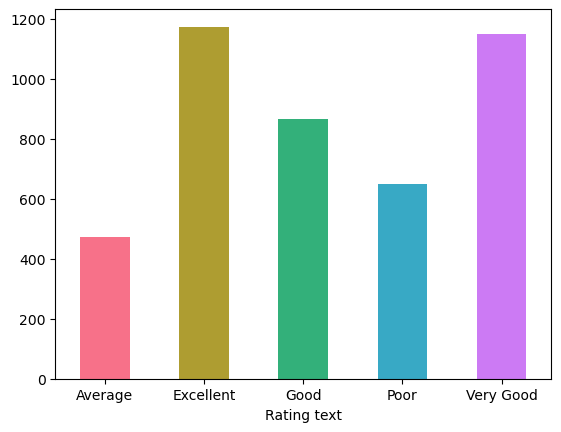

In [171]:
palette = sns.color_palette("husl", len(df['Rating text'].unique()))
df.groupby('Rating text')['Average Cost for two'].mean().plot(kind = 'bar', color = palette)
plt.xticks(rotation = 0)
plt.show()

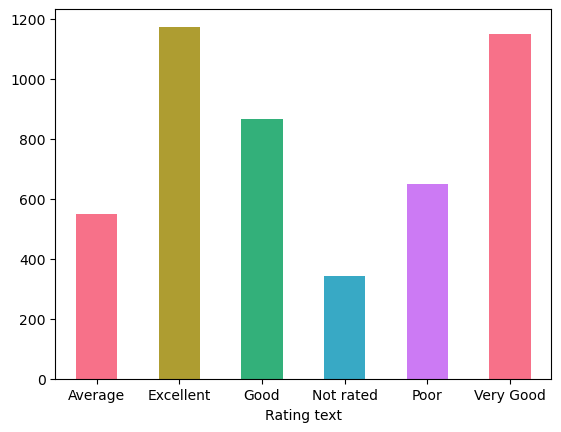

In [172]:
palette = sns.color_palette("husl", len(df['Rating text'].unique()))
data.groupby('Rating text')['Average Cost for two'].mean().plot(kind = 'bar', color = palette)
plt.xticks(rotation = 0)
plt.show()

In [173]:
df['City'].value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Lucknow           21
Bhubaneshwar      21
Amritsar          21
Pune              20
Puducherry        20
Patna             20
Ludhiana          20
Ranchi            20
Surat             20
Vadodara          20
Nashik            20
Nagpur            20
Mysore            20
Mumbai            20
Varanasi          20
Mangalore         20
Agra              20
Kochi             20
Kolkata           20
Dehradun          20
Allahabad         20
Aurangabad        20
Bangalore         20
Bhopal            20
Chennai           20
Coimbatore        20
Goa               20
Indore            20
Jaipur            20
Kanpur            20
Vizag             20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Panchkula          1
Mohali             1
Name: count, dtype: int64

In [174]:
x = df.groupby('City')['Average Cost for two'].mean().nlargest(10)

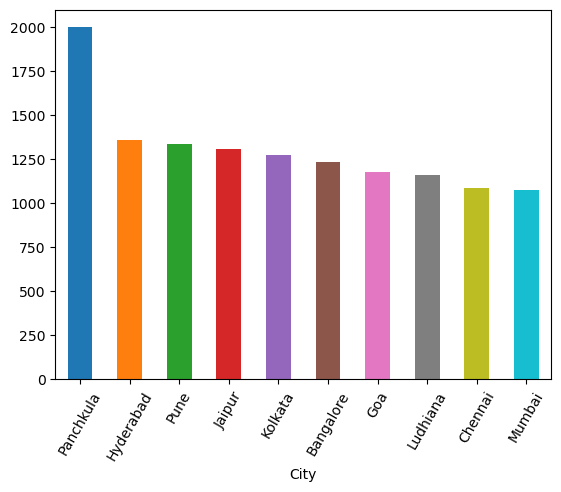

In [175]:
x.plot(kind = 'bar', color = sns.color_palette())
plt.xticks(rotation = 60)
plt.show()

In [176]:
cuisine_series = df['Cuisines'].str.split(', ').explode()
cuisine_counts = cuisine_series.value_counts()
sorted_cuisine_counts = cuisine_counts.sort_values(ascending=False)
sorted_cuisine_counts

#Combination Encoding

Cuisines
North Indian      3946
Chinese           2690
Fast Food         1963
Mughlai            992
Bakery             726
                  ... 
Cuisine Varies       1
Deli                 1
Sri Lankan           1
BBQ                  1
Cajun                1
Name: count, Length: 90, dtype: int64

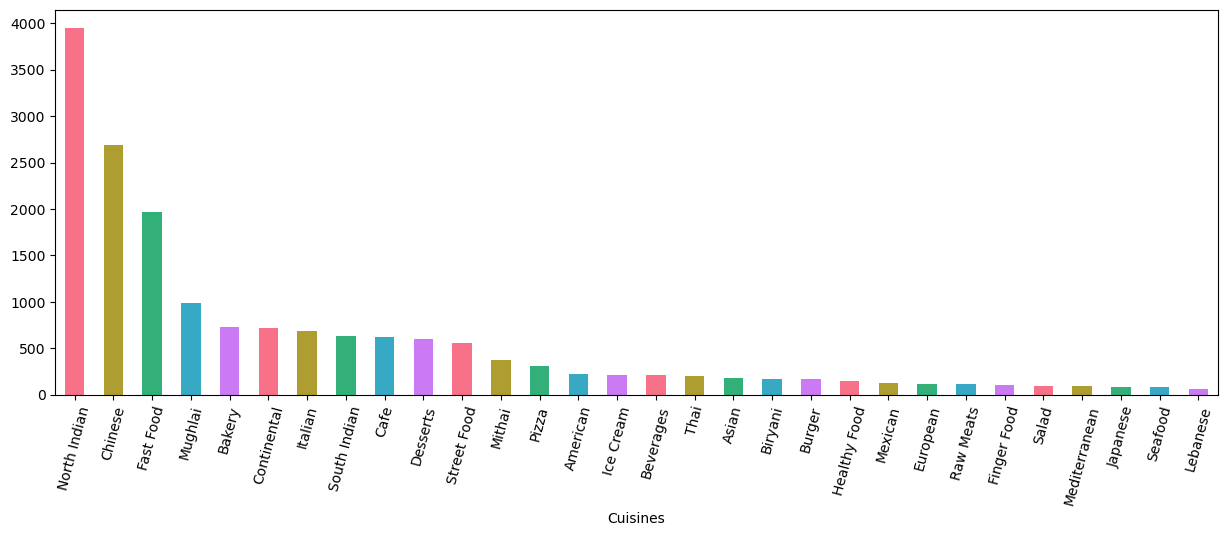

In [263]:
y = sorted_cuisine_counts.nlargest(30)
y.plot(kind = 'bar', color = palette, figsize = (15, 5))
plt.xticks(rotation = 75)
plt.show()

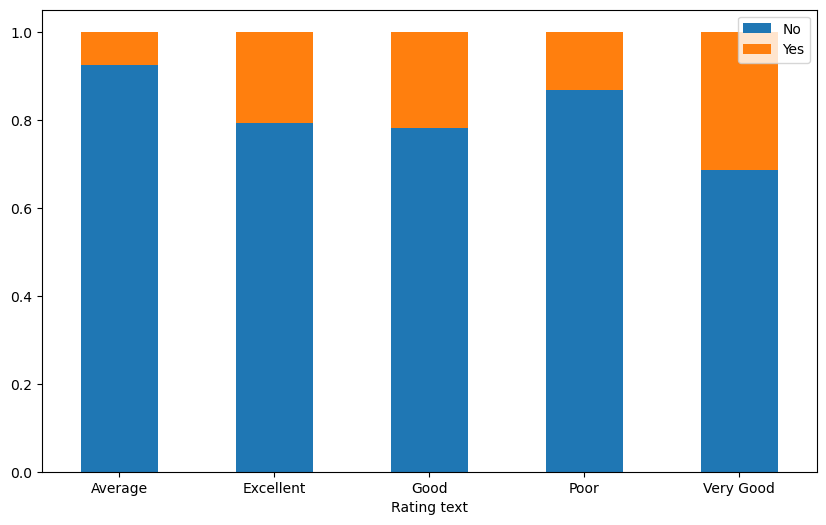

In [281]:
z = pd.crosstab(df['Rating text'], df['Has Table booking'])
z = z.div(z.sum(1).astype(float), axis = 0)
z_normalized.plot(kind='bar', stacked = True, figsize = (10,6))
plt.xticks(rotation=0)
plt.legend(loc = 'best')
plt.show()

In [282]:
df

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,,,,,,,,,,,,
3400025,Agra,"North Indian, Mughlai",850,No,No,No,No,3,3.9,Yellow,Good,140
3400341,Agra,"North Indian, Mughlai",700,No,No,No,No,2,3.5,Yellow,Good,71
3400005,Agra,North Indian,500,No,No,No,No,2,3.6,Yellow,Good,94
3400021,Agra,Rajasthani,400,No,No,No,No,2,4.0,Green,Very Good,87
3400017,Agra,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...
2800100,Vizag,"Continental, Seafood, Chinese, North Indian, B...",600,No,No,No,No,2,3.6,Yellow,Good,193
2800418,Vizag,"Cafe, North Indian, Chinese",400,No,No,No,No,2,3.7,Yellow,Good,85
2800881,Vizag,"Burger, Pizza, Biryani",600,No,No,No,No,2,4.3,Green,Very Good,172


In [297]:
cuisine_count = df['Cuisines'].value_counts()

In [298]:
cuisine_count = pd.DataFrame(cuisine_count)

In [299]:
cuisine_count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1392 entries, North Indian to American, North Indian, Thai, Continental
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   1392 non-null   int64
dtypes: int64(1)
memory usage: 21.8+ KB


In [337]:
valid_cuisines = cuisine_count[cuisine_count['count'] >= 5].index.tolist()
filtered_df = df[df['Cuisines'].isin(valid_cuisines)]

In [338]:
filtered_df = pd.DataFrame(filtered_df)

In [339]:
filtered_df['Cuisines'].value_counts()

Cuisines
North Indian                                    936
North Indian, Chinese                           511
Fast Food                                       348
Chinese                                         340
North Indian, Mughlai                           334
                                               ... 
North Indian, Mughlai, Chinese, South Indian      5
Street Food, South Indian, Mithai                 5
North Indian, European                            5
European, Continental                             5
North Indian, Chinese, South Indian, Mithai       5
Name: count, Length: 165, dtype: int64

In [340]:
oe = sk.OrdinalEncoder()

In [341]:
filtered_df.drop('Rating color', axis = 1, inplace = True)

In [342]:
filtered_df

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
Restaurant ID,,,,,,,,,,,
3400025,Agra,"North Indian, Mughlai",850,No,No,No,No,3,3.9,Good,140
3400341,Agra,"North Indian, Mughlai",700,No,No,No,No,2,3.5,Good,71
3400005,Agra,North Indian,500,No,No,No,No,2,3.6,Good,94
3400017,Agra,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,Very Good,177
3400325,Agra,"North Indian, European",2000,No,No,No,No,4,4.0,Very Good,45
...,...,...,...,...,...,...,...,...,...,...,...
2800095,Vizag,"North Indian, Biryani",300,No,No,No,No,1,3.7,Good,240
2800757,Vizag,Fast Food,450,No,No,No,No,2,3.8,Good,175
2800897,Vizag,Fast Food,500,No,No,No,No,2,3.7,Good,57


In [344]:
filtered_df[['Rating text']] = oe.fit_transform(filtered_df[['Rating text']])

In [345]:
filtered_df

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
Restaurant ID,,,,,,,,,,,
3400025,Agra,"North Indian, Mughlai",850,No,No,No,No,3,3.9,2.0,140
3400341,Agra,"North Indian, Mughlai",700,No,No,No,No,2,3.5,2.0,71
3400005,Agra,North Indian,500,No,No,No,No,2,3.6,2.0,94
3400017,Agra,"North Indian, Chinese, Mughlai",1000,No,No,No,No,3,4.2,4.0,177
3400325,Agra,"North Indian, European",2000,No,No,No,No,4,4.0,4.0,45
...,...,...,...,...,...,...,...,...,...,...,...
2800095,Vizag,"North Indian, Biryani",300,No,No,No,No,1,3.7,2.0,240
2800757,Vizag,Fast Food,450,No,No,No,No,2,3.8,2.0,175
2800897,Vizag,Fast Food,500,No,No,No,No,2,3.7,2.0,57


In [412]:
filtered_df['Rating text'].unique()

array([2., 4., 1., 0., 3.])

In [347]:
obj_cols = filtered_df.select_dtypes(include = 'object').columns
for cols in obj_cols:
    filtered_df[cols] = le.fit_transform(filtered_df[cols])

In [348]:
filtered_df

,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating text,Votes
Restaurant ID,,,,,,,,,,,
3400025,0,131,850,0,0,0,0,3,3.9,2.0,140
3400341,0,131,700,0,0,0,0,2,3.5,2.0,71
3400005,0,106,500,0,0,0,0,2,3.6,2.0,94
3400017,0,115,1000,0,0,0,0,3,4.2,4.0,177
3400325,0,125,2000,0,0,0,0,4,4.0,4.0,45
...,...,...,...,...,...,...,...,...,...,...,...
2800095,41,107,300,0,0,0,0,1,3.7,2.0,240
2800757,41,65,450,0,0,0,0,2,3.8,2.0,175
2800897,41,65,500,0,0,0,0,2,3.7,2.0,57


In [350]:
df['Switch to order menu'].value_counts()

Switch to order menu
No    8652
Name: count, dtype: int64

In [351]:
filtered_df.drop('Switch to order menu', axis = 1, inplace = True)

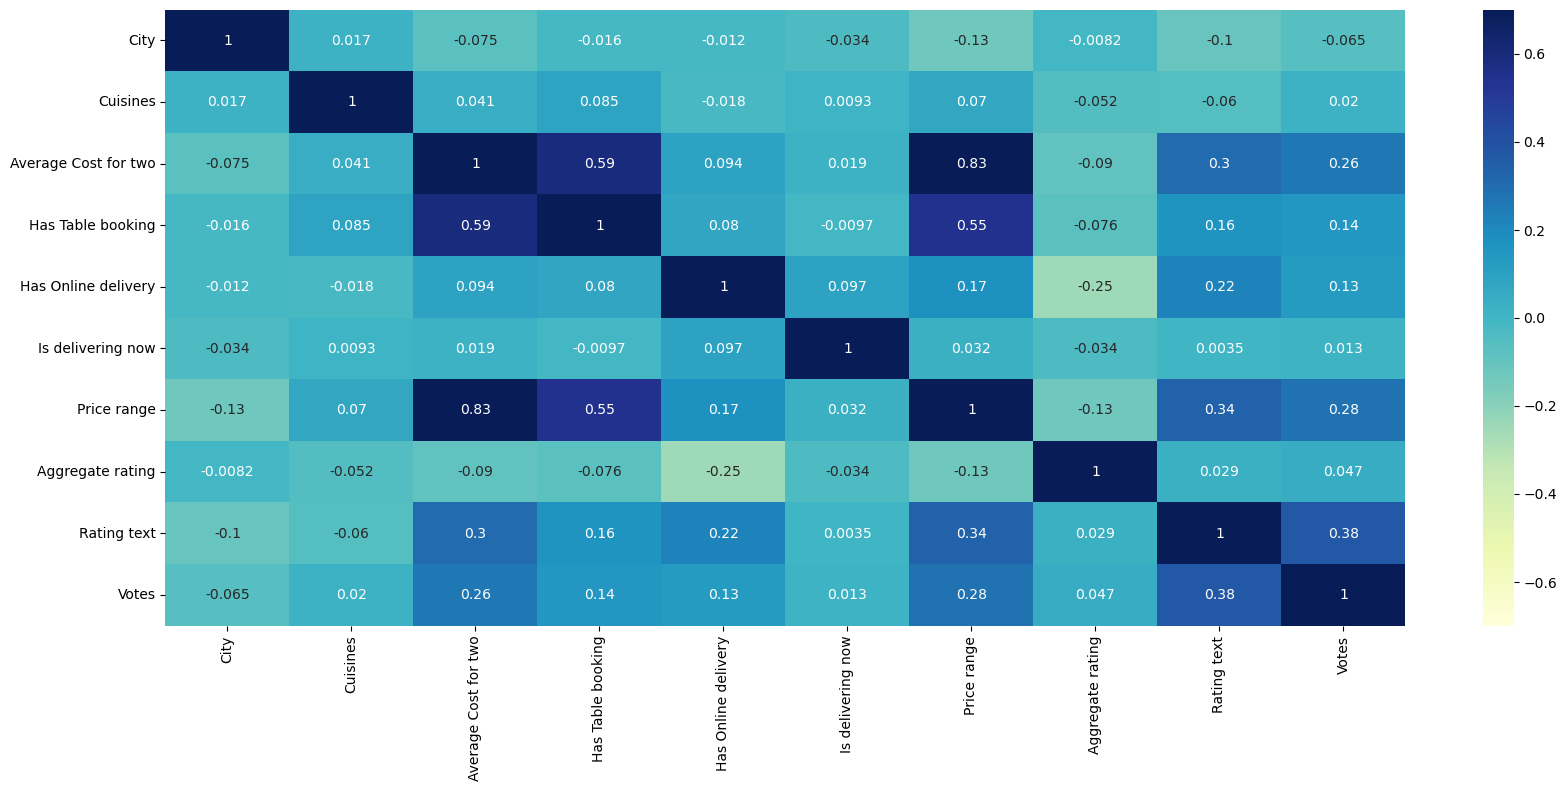

In [352]:
plt.subplots(figsize = (20,8))
sns.heatmap(filtered_df.corr(), annot = True, vmin = -0.7, vmax = 0.7, cmap = 'YlGnBu')
plt.show()